# Generating a Cumulative Frequency Diagram

#### By: Landon Moeller

In [ ]:
#importing packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.dates as mdates

In [2]:
#loaing different epochs
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

In [3]:
#sifting through the historical dataset, following threshold for all severe
df_HIST = df_HIST[((df_HIST['DBZ'] >= 40.0) & (df_HIST['UVV'] >= 25.0))]
df_HIST['Time'] = pd.to_datetime(df_HIST['Time'])
df_HIST['Date'] = pd.to_datetime(df_HIST['Time']).dt.date
df_HIST['Year'] = pd.to_datetime(df_HIST['Time']).dt.year
df_HIST['Month'] = pd.to_datetime(df_HIST['Time']).dt.month
df_HIST

,Unnamed: 0,x,y,Time,UH,DBZ,UVV,Date,Year,Month
101,101,716,395,1990-10-31 02:00:00,3.842521,48.058720,25.550886,1990-10-31,1990,10
120,120,734,412,1990-10-31 02:00:00,13.531029,49.188890,25.854595,1990-10-31,1990,10
349,349,717,187,1990-10-31 16:00:00,8.786777,41.898490,26.714376,1990-10-31,1990,10
371,371,655,107,1990-10-31 17:00:00,43.998700,48.578342,25.945530,1990-10-31,1990,10
372,372,656,107,1990-10-31 17:00:00,41.527390,55.626390,25.919870,1990-10-31,1990,10
...,...,...,...,...,...,...,...,...,...,...
3740668,258787,1155,110,2005-09-14 21:00:00,0.016781,53.271744,25.001713,2005-09-14,2005,9
3740886,259005,645,160,2005-09-17 23:00:00,0.000000,53.327133,25.278793,2005-09-17,2005,9
3741083,259202,1138,153,2005-09-20 02:00:00,3.046426,54.416164,25.023745,2005-09-20,2005,9
3741186,259305,1102,148,2005-09-23 01:00:00,8.934043,42.131530,25.133116,2005-09-23,2005,9


In [4]:
#mid 4.5
df_4p5MID = df_4p5MID[((df_4p5MID['DBZ'] >= 40.0) & (df_4p5MID['UVV'] >= 25.0))]
df_4p5MID['Time'] = pd.to_datetime(df_4p5MID['Time'])
df_4p5MID['Date'] = pd.to_datetime(df_4p5MID['Time']).dt.date
df_4p5MID['Year'] = pd.to_datetime(df_4p5MID['Time']).dt.year
df_4p5MID['Month'] = pd.to_datetime(df_4p5MID['Time']).dt.month
df_4p5MID

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Year,Month
188,188,852,431,2040-10-01 10:00:00,26.629720,54.007164,2040-10-01,2040,10
311,311,806,315,2040-10-01 20:00:00,28.970072,54.080643,2040-10-01,2040,10
384,384,805,338,2040-10-01 22:00:00,32.192024,58.205700,2040-10-01,2040,10
385,385,806,338,2040-10-01 22:00:00,27.209646,58.780155,2040-10-01,2040,10
431,431,733,285,2040-10-01 23:00:00,25.657946,40.255960,2040-10-01,2040,10
...,...,...,...,...,...,...,...,...,...
4651049,21848,946,243,2055-09-28 07:00:00,27.730669,51.568604,2055-09-28,2055,9
4651055,21854,942,244,2055-09-28 07:00:00,25.043747,54.759617,2055-09-28,2055,9
4651085,21884,949,221,2055-09-28 08:00:00,27.759054,55.535416,2055-09-28,2055,9
4651096,21895,957,232,2055-09-28 08:00:00,25.300505,51.518154,2055-09-28,2055,9


In [5]:
#mid 8.5
df_8p5MID = df_8p5MID[((df_8p5MID['DBZ'] >= 40.0) & (df_8p5MID['UVV'] >= 25.0))]
df_8p5MID['Time'] = pd.to_datetime(df_8p5MID['Time'])
df_8p5MID['Date'] = pd.to_datetime(df_8p5MID['Time']).dt.date
df_8p5MID['Month'] = pd.to_datetime(df_8p5MID['Time']).dt.month
df_8p5MID['Year'] = pd.to_datetime(df_8p5MID['Time']).dt.year
df_8p5MID

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Month,Year
19,19,570,206,2040-10-01 04:00:00,26.506720,41.974102,2040-10-01,10,2040
20,20,571,206,2040-10-01 04:00:00,28.058992,50.332855,2040-10-01,10,2040
21,21,572,206,2040-10-01 04:00:00,27.315520,52.738167,2040-10-01,10,2040
22,22,573,206,2040-10-01 04:00:00,26.366625,51.981960,2040-10-01,10,2040
23,23,574,206,2040-10-01 04:00:00,25.566341,50.218967,2040-10-01,10,2040
...,...,...,...,...,...,...,...,...,...
4796687,10675,838,673,2055-09-28 01:00:00,25.314558,47.214275,2055-09-28,9,2055
4796802,10790,924,712,2055-09-28 01:00:00,25.851837,45.725967,2055-09-28,9,2055
4796808,10796,943,714,2055-09-28 01:00:00,25.776848,53.437927,2055-09-28,9,2055
4797156,11144,865,600,2055-09-28 13:00:00,25.324047,45.770496,2055-09-28,9,2055


In [6]:
#4.5 end
df_4p5END = df_4p5END[((df_4p5END['DBZ'] >= 40.0) & (df_4p5END['UVV'] >= 25.0))]
df_4p5END['Time'] = pd.to_datetime(df_4p5END['Time'])
df_4p5END['Date'] = pd.to_datetime(df_4p5END['Time']).dt.date
df_4p5END['Year'] = pd.to_datetime(df_4p5END['Time']).dt.year
df_4p5END['Month'] = pd.to_datetime(df_4p5END['Time']).dt.month
df_4p5END

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Year,Month
7,7,788,193,2085-10-01 13:00:00,25.434715,56.293450,2085-10-01,2085,10
79,79,635,148,2085-10-01 17:00:00,25.475512,57.396957,2085-10-01,2085,10
310,310,735,153,2085-10-02 17:00:00,26.880249,53.751087,2085-10-02,2085,10
793,793,720,176,2085-10-04 21:00:00,28.071428,53.461117,2085-10-04,2085,10
1046,1046,937,227,2085-10-05 17:00:00,26.975183,57.380010,2085-10-05,2085,10
...,...,...,...,...,...,...,...,...,...
4922363,5022,797,368,2100-09-29 23:00:00,27.055683,45.304573,2100-09-29,2100,9
4922400,5059,837,360,2100-09-30 00:00:00,25.570307,43.356650,2100-09-30,2100,9
4922406,5065,832,361,2100-09-30 00:00:00,26.935200,46.976204,2100-09-30,2100,9
4922407,5066,833,361,2100-09-30 00:00:00,28.031430,53.051968,2100-09-30,2100,9


In [7]:
#8.5 end
df_8p5END = df_8p5END[((df_8p5END['DBZ'] >= 40.0) & (df_8p5END['UVV'] >= 25.0))]
df_8p5END['Time'] = pd.to_datetime(df_8p5END['Time'])
df_8p5END['Date'] = pd.to_datetime(df_8p5END['Time']).dt.date
df_8p5END['Year'] = pd.to_datetime(df_8p5END['Time']).dt.year
df_8p5END['Month'] = pd.to_datetime(df_8p5END['Time']).dt.month
df_8p5END

,Unnamed: 0,x,y,Time,UVV,DBZ,Date,Year,Month
356,356,654,390,2085-10-03 00:00:00,25.241732,51.156340,2085-10-03,2085,10
367,367,655,391,2085-10-03 00:00:00,27.544153,50.573160,2085-10-03,2085,10
368,368,656,391,2085-10-03 00:00:00,26.026220,55.052750,2085-10-03,2085,10
405,405,659,405,2085-10-03 00:00:00,25.788498,53.210120,2085-10-03,2085,10
627,627,676,414,2085-10-03 01:00:00,26.994015,52.814194,2085-10-03,2085,10
...,...,...,...,...,...,...,...,...,...
6266504,9084,853,506,2100-09-19 00:00:00,25.244360,50.804600,2100-09-19,2100,9
6266916,9496,1166,402,2100-09-28 01:00:00,26.401280,47.143310,2100-09-28,2100,9
6266959,9539,948,311,2100-09-28 03:00:00,25.033474,46.046646,2100-09-28,2100,9
6267273,9853,1098,268,2100-09-29 20:00:00,25.797821,40.929188,2100-09-29,2100,9


In [8]:
#function to convert water year to calendar year
def Cumu_sum(df):

    daily_counts = pd.DataFrame(index=np.arange(1,366,1))
    df['Day_of_Year'] = pd.to_datetime(df['Date']).dt.dayofyear
    
    for year in df['Year'].unique()[:-1]:
        b=[]
        
        if year == np.min(df['Year'].unique()):
            df_year = df[((df['Year'] == np.min(df['Year'].unique())) | (df['Year'] == np.max(df['Year'].unique())))]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
            
        else:
            df_year = df[(df['Year'] == year)]
            
            for day in np.arange(1,366,1):
                df_sub = df_year[(df_year['Day_of_Year'] == day)]
                b.append(len(df_sub))
            
        daily_counts[year] = b
            
    return daily_counts

In [9]:
#calling each epoch's dataframe into the function
new_df_HIST = Cumu_sum(df_HIST)
new_df_4p5MID = Cumu_sum(df_4p5MID)
new_df_8p5MID = Cumu_sum(df_8p5MID)
new_df_4p5END = Cumu_sum(df_4p5END)
new_df_8p5END = Cumu_sum(df_8p5END)

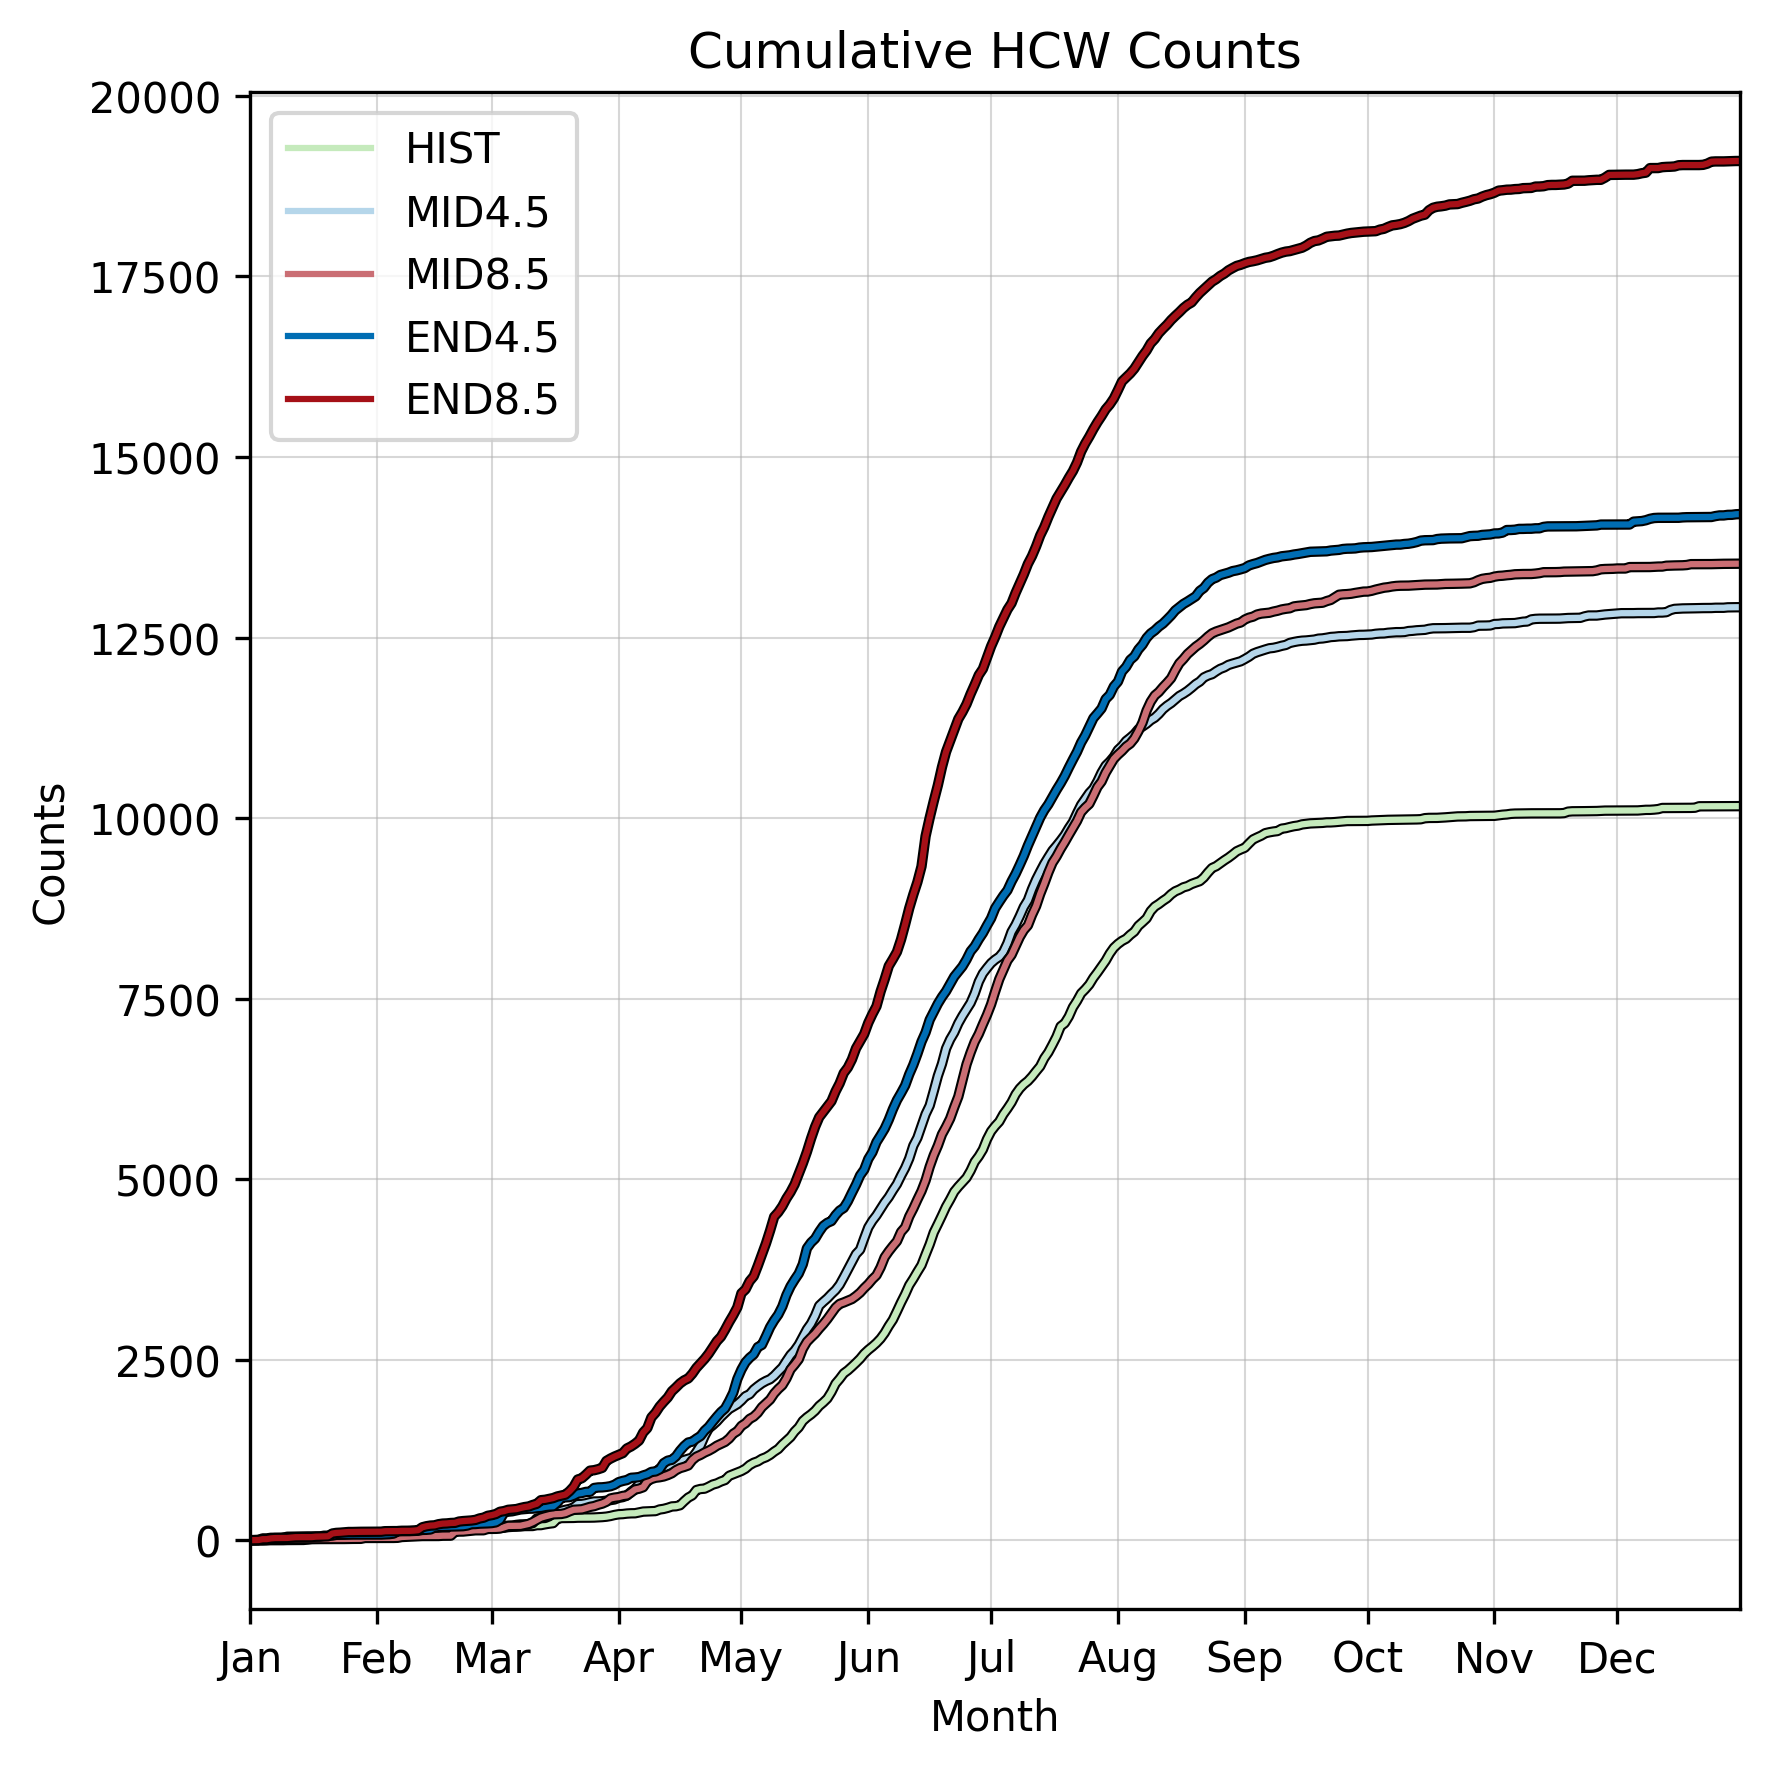

In [12]:
#figure specifications and plotting
fig, ax = plt.subplots(figsize = (6, 6), dpi = 300)

ax.set_title('Cumulative HCW Counts')
ax.set_xlabel('Month')
ax.set_ylabel('Counts')
ax.grid(lw = 0.5, alpha = 0.5, zorder = 0.1)

#hist
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_HIST.mean(axis = 1)), c = 'black', lw = 2.5)
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_HIST.mean(axis = 1)), c = '#c5eabc', label = 'HIST')

#mid
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_4p5MID.mean(axis = 1)), c = 'black', lw = 2.5)
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_4p5MID.mean(axis = 1)), c = '#b5d6ea', label = 'MID4.5')
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_8p5MID.mean(axis = 1)), c = 'black', lw = 2.5)
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_8p5MID.mean(axis = 1)), c = '#ca6e74', label = 'MID8.5')

#end
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_4p5END.mean(axis = 1)), c = 'black', lw = 2.5)
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_4p5END.mean(axis = 1)), c = '#006db3', label = 'END4.5')
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_8p5END.mean(axis = 1)), c = 'black', lw = 2.5)
ax.plot(np.arange(1, 366, 1), np.cumsum(new_df_8p5END.mean(axis = 1)), c = '#a51017', label = 'END8.5')

#setting x-axis ticks to months
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_xlim(0, 364)
ax.legend()
plt.tight_layout()
#plt.savefig('Cumulative Frequency.png', dpi = 300, bbox_inches='tight')